In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Create validation dir

In [2]:
# Directory with training organic images
train_organic_dir = os.path.join("/kaggle/input/waste-classification-data/DATASET/TRAIN/O")

# Directory with training recycle images
train_recycle_dir = os.path.join("/kaggle/input/waste-classification-data/DATASET/TRAIN/R")

# Directory with test organic images
test_organic_dir = os.path.join("/kaggle/input/waste-classification-data/DATASET/TEST/O")

# Directory with test recycle images
test_recycle_dir = os.path.join("/kaggle/input/waste-classification-data/DATASET/TEST/R")

# Directory with validation organic images
val_organic_dir = '/kaggle/working/VALIDATION/O'

# Directory with validation recycle images
val_recycle_dir = '/kaggle/working/VALIDATION/R'

if not os.path.exists(val_organic_dir):
    os.makedirs(val_organic_dir)
    
if not os.path.exists(val_recycle_dir):
    os.makedirs(val_recycle_dir)

### Split

In [3]:
import os
from sklearn.model_selection import train_test_split
from shutil import copyfile

val_size = 0.2 

if not os.listdir(val_organic_dir) and not os.listdir(val_recycle_dir):
    train_organic, val_organic = train_test_split(os.listdir(train_organic_dir), test_size=val_size, random_state=21946201)
    train_recycle, val_recycle = train_test_split(os.listdir(train_recycle_dir), test_size=val_size, random_state=21946201)

    for organic in val_organic:
        src_path = os.path.join(train_organic_dir, organic)
        dst_path = os.path.join(val_organic_dir, organic)
        copyfile(src_path, dst_path)

    for recycle in val_recycle:
        src_path = os.path.join(train_recycle_dir, recycle)
        dst_path = os.path.join(val_recycle_dir, recycle)
        copyfile(src_path, dst_path)
else:
    print("Data validation is exist.")

### Directory details

In [4]:
train_organic_names = os.listdir(train_organic_dir)
print(f'TRAIN SET ORGANIC: {train_organic_names[:10]}')

train_recycle_names = os.listdir(train_recycle_dir)
print(f'TRAIN SET RECYCLE: {train_recycle_names[:10]}')

test_organic_names = os.listdir(test_organic_dir)
print(f'TEST SET ORGANIC: {test_organic_names[:10]}')

test_recycle_names = os.listdir(test_recycle_dir)
print(f'TEST SET RECYCLE: {test_recycle_names[:10]}')

val_organic_names = os.listdir(val_organic_dir)
print(f'VAL SET ORGANIC: {val_organic_names[:10]}')

val_recycle_names = os.listdir(val_recycle_dir)
print(f'VAL SET RECYCLE: {val_recycle_names[:10]}')

TRAIN SET ORGANIC: ['O_5670.jpg', 'O_1764.jpg', 'O_9501.jpg', 'O_364.jpg', 'O_5301.jpg', 'O_2993.jpg', 'O_7252.jpg', 'O_5410.jpg', 'O_2975.jpg', 'O_9341.jpg']
TRAIN SET RECYCLE: ['R_6214.jpg', 'R_8141.jpg', 'R_2463.jpg', 'R_9892.jpg', 'R_5469.jpg', 'R_6347.jpg', 'R_6353.jpg', 'R_3408.jpg', 'R_9369.jpg', 'R_7688.jpg']
TEST SET ORGANIC: ['O_13927.jpg', 'O_12651.jpg', 'O_13771.jpg', 'O_13720.jpg', 'O_13446.jpg', 'O_13807.jpg', 'O_12899.jpg', 'O_12588.jpg', 'O_12749.jpg', 'O_12693.jpg']
TEST SET RECYCLE: ['R_10683.jpg', 'R_10736.jpg', 'R_10489.jpg', 'R_10512.jpg', 'R_10975.jpg', 'R_10064.jpg', 'R_10281.jpg', 'R_10384.jpg', 'R_10986.jpg', 'R_10870.jpg']
VAL SET ORGANIC: ['O_2653.jpg', 'O_5203.jpg', 'O_3944.jpg', 'O_1628.jpg', 'O_5030.jpg', 'O_11128.jpg', 'O_3885.jpg', 'O_4947.jpg', 'O_11684.jpg', 'O_1153.jpg']
VAL SET RECYCLE: ['R_3305.jpg', 'R_8061.jpg', 'R_1723.jpg', 'R_9350.jpg', 'R_4596.jpg', 'R_8614.jpg', 'R_7140.jpg', 'R_7884.jpg', 'R_7385.jpg', 'R_6321.jpg']


In [5]:
print(f'total training organic images: {len(os.listdir(train_organic_dir))}')
print(f'total training recycle images: {len(os.listdir(train_recycle_dir))}')
print(f'total test organic images: {len(os.listdir(test_organic_dir))}')
print(f'total test recycle images: {len(os.listdir(test_recycle_dir))}')
print(f'total validation organic images: {len(os.listdir(val_organic_dir))}')
print(f'total validation recycle images: {len(os.listdir(val_recycle_dir))}')

total training organic images: 12565
total training recycle images: 9999
total test organic images: 1401
total test recycle images: 1112
total validation organic images: 2513
total validation recycle images: 2000


### Let's look our data

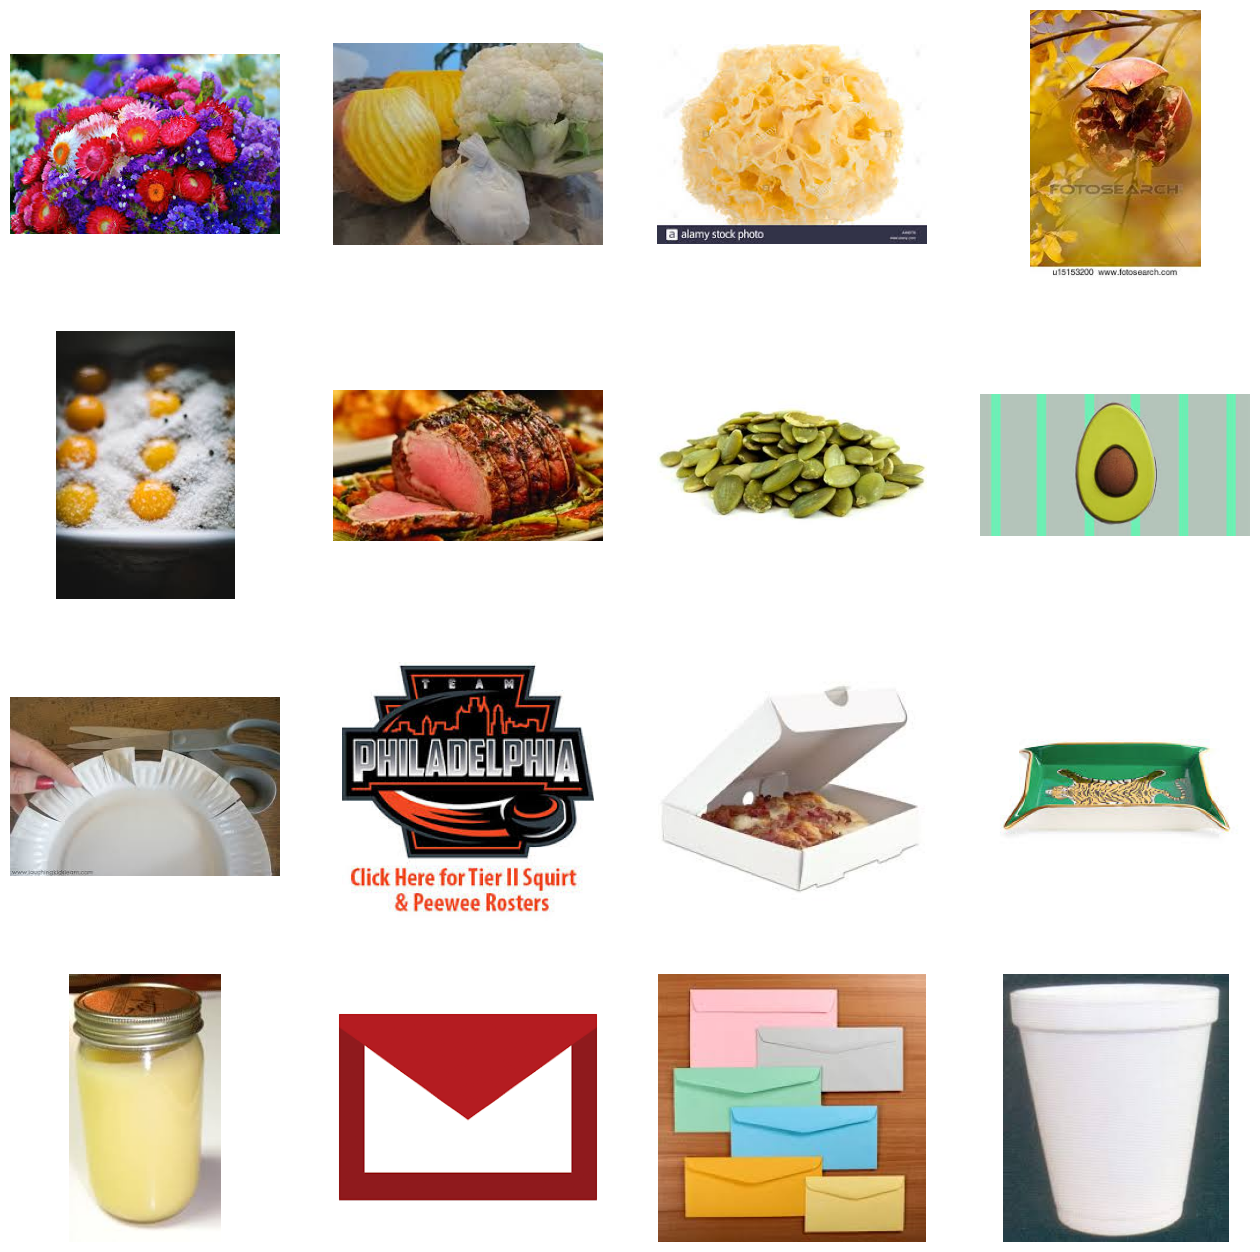

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_organic_dir, fname)
                for fname in train_organic_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_recycle_dir, fname)
                for fname in train_recycle_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Model

In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 512)               4

In [8]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
                "/kaggle/input/waste-classification-data/DATASET/TRAIN",
                target_size=(150, 150),
                batch_size=128,
                class_mode='binary')

val_generator = val_datagen.flow_from_directory(
                "/kaggle/working/VALIDATION/",
                target_size=(150, 150),
                batch_size=128,
                class_mode='binary')

Found 22564 images belonging to 2 classes.
Found 4513 images belonging to 2 classes.


In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch=176, # 22,564 images = batch_size * steps
      epochs=10,
      verbose=1,
      validation_data = val_generator, # 4,513 images = batch_size * steps
      validation_steps=36)

Epoch 1/10
176/176 [==============================] - 532s 3s/step - loss: 0.8836 - accuracy: 0.7610 - val_loss: 0.4450 - val_accuracy: 0.8086
Epoch 2/10
176/176 [==============================] - 523s 3s/step - loss: 0.4305 - accuracy: 0.8079 - val_loss: 0.4094 - val_accuracy: 0.8099
Epoch 3/10
176/176 [==============================] - 522s 3s/step - loss: 0.3975 - accuracy: 0.8262 - val_loss: 0.3678 - val_accuracy: 0.8438
Epoch 4/10
176/176 [==============================] - 521s 3s/step - loss: 0.3725 - accuracy: 0.8403 - val_loss: 0.3349 - val_accuracy: 0.8606
Epoch 5/10
176/176 [==============================] - 521s 3s/step - loss: 0.3461 - accuracy: 0.8506 - val_loss: 0.3006 - val_accuracy: 0.8719
Epoch 6/10
176/176 [==============================] - 523s 3s/step - loss: 0.3193 - accuracy: 0.8645 - val_loss: 0.2877 - val_accuracy: 0.8870
Epoch 7/10
176/176 [==============================] - 524s 3s/step - loss: 0.2831 - accuracy: 0.8805 - val_loss: 0.2428 - val_accuracy: 0.8930

### Model Evaluation

In [11]:
# try
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training_accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')

  plt.show()

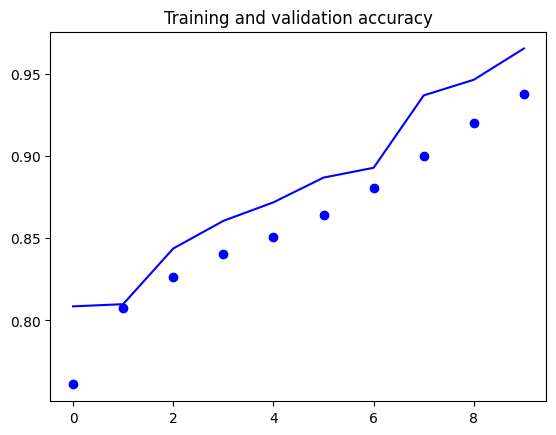

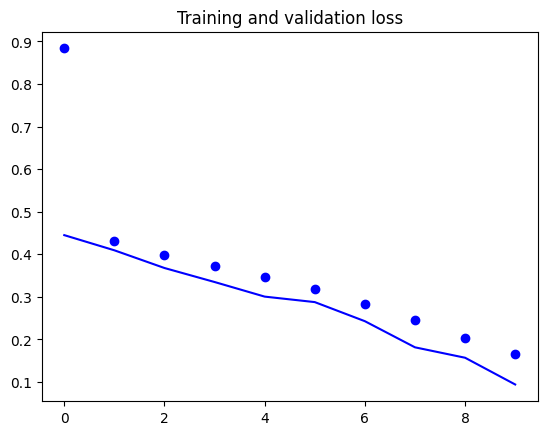

In [12]:
plot_loss_acc(history)

### Save model

In [13]:
model.save('model/model_v1.h5')

In [14]:
mode = tf.keras.models.load_model('model/model_v1.h5')

In [46]:
loss, accuracy = model.evaluate(val_generator)

36/36 [==============================] - 28s 764ms/step - loss: 0.0941 - accuracy: 0.9657


In [52]:
print("Model loss: ", loss)
print("Model accuracy: ", accuracy*100, "%")

Model loss:  0.09411800652742386
Model accuracy:  96.56547904014587 %


1/1 [==============================] - 0s 70ms/step
The image belongs to Wet waste category 


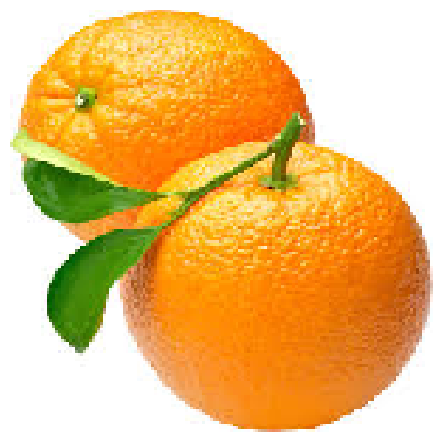

In [40]:
# Wet Waste

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from skimage.io import imread, imshow

dic = val_generator.class_indices
idc = {k:v for v,k in dic.items()}

img = load_img('/kaggle/working/VALIDATION/O/O_11128.jpg', target_size=(150,150))
img = img_to_array(img)
img = img / 255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = model.predict(img)

if answer[0][0] > 0.5:
    print("The image belongs to Dry waste category")
else:
    print("The image belongs to Wet waste category ")

1/1 [==============================] - 0s 71ms/step
The image belongs to Dry waste category


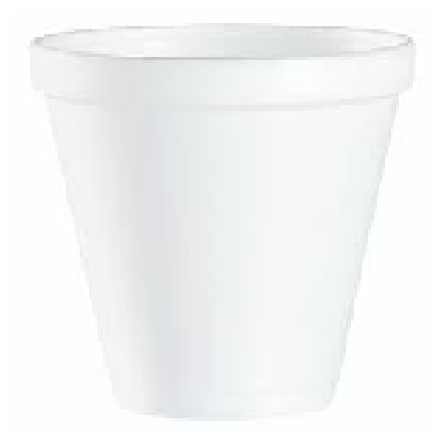

In [44]:
# Dry Waste

dic = val_generator.class_indices
idc = {k:v for v,k in dic.items()}

img = load_img('/kaggle/working/VALIDATION/R/R_3305.jpg', target_size=(150,150))
img = img_to_array(img)
img = img / 255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = model.predict(img)


if answer[0][0] > 0.5:
    print("The image belongs to Dry waste category")
else:
    print("The image belongs to Wet waste category ")

1/1 [==============================] - 0s 69ms/step
The image belongs to Dry waste category


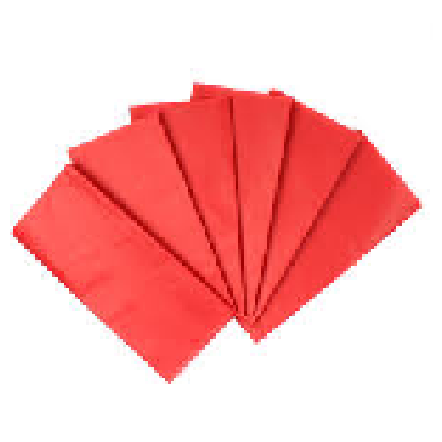

In [45]:
# Random Image Classification

dic = val_generator.class_indices
idc = {k:v for v,k in dic.items()}

img = load_img('/kaggle/input/dry-wet/R_11072.jpg', target_size=(150,150))
img = img_to_array(img)
img = img / 255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = model.predict(img)


if answer[0][0] > 0.5:
    print("The image belongs to Dry waste category")
else:
    print("The image belongs to Wet waste category ")